## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("/content/train_dataset_train.csv")
df_test = pd.read_csv('test_dataset_test.csv')

## Рассмотрим датасет по ближе

In [3]:
df.head(10)

,id,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,...,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5,target
0,15182,32.0,9/30/2020,6694527,1469,8/26/2020,163.0,0.0,1.0,0.0,...,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,0
1,89385,NaN,6/30/2021,6712877,1392,8/5/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,47931,NaN,2/28/2021,6659444,376,6/20/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,279085,1.0,11/30/2021,7151591,1160,4/14/2021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,7806,30.0,10/31/2020,6705666,952,7/19/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,0
5,221530,NaN,4/30/2021,6784019,789,12/20/2020,9.0,NaN,0.0,0.0,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,0
6,80963,5.0,4/30/2021,6409144,242,2/27/2021,28.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.566105,NaN,NaN,0
7,220105,NaN,4/30/2021,6314133,998,10/4/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0
8,215541,30.0,3/31/2021,6880163,459,11/6/2020,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,5.0,NaN,NaN,5.000000,NaN,NaN,3
9,73193,11.0,5/31/2021,6629109,871,6/21/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df.shape

(200000, 59)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 59 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   age_indicator              159123 non-null  float64
 2   month_id                   200000 non-null  object 
 3   student_id                 200000 non-null  int64  
 4   program_id                 200000 non-null  int64  
 5   carts_created_at           200000 non-null  object 
 6   spent_time_total           86309 non-null   float64
 7   spent_time_to_complete_hw  42467 non-null   float64
 8   completed_hw               97599 non-null   float64
 9   failed_hw                  97599 non-null   float64
 10  reworked_hw                97599 non-null   float64
 11  interacted_hw              97599 non-null   float64
 12  avg_hw_mark                44496 non-null   float64
 13  test_with_good_mark        97

Посмотрим на уникальные значения следующих категориальных данных:

In [6]:
print(df['promo'].unique())
print(df['os'].unique())
print(df['browser'].unique())
print(df['platform'].unique())
print(df['payment_type'].unique())
print(df['communication_type'].unique())

['+' '-']
[nan 'Windows' 'Mac OS X' 'iOS' 'Android' 'Linux' 'Ubuntu' 'Chrome OS'
 'Fedora']
[nan 'Chrome' 'Opera' 'Yandex Browser' 'Mobile Safari' 'Instagram'
 'Chrome Mobile' 'Safari' 'Edge' 'Google' 'Firefox' 'Chrome Mobile iOS'
 'Samsung Internet' 'MiuiBrowser' 'Facebook' 'Opera Mobile'
 'Chrome Mobile WebView' 'HeadlessChrome' 'YandexSearch' 'Firefox Mobile'
 'Mobile Safari UI/WKWebView' 'Chromium' 'UC Browser' 'Edge Mobile'
 'Firefox iOS' 'Iron' 'Android']
[nan 'pc' 'mobile' 'tablet']
[1 2]
['phone' 'order' 'web' nan]


In [7]:
print(df_test['promo'].unique())
print(df_test['os'].unique())
print(df_test['browser'].unique())
print(df_test['platform'].unique())
print(df_test['payment_type'].unique())
print(df_test['communication_type'].unique())

['-' '+']
['Windows' 'iOS' 'Android' nan 'Mac OS X' 'Chrome OS' 'Linux' 'Ubuntu'
 'Fedora']
['Chrome' 'Instagram' 'Facebook' 'Chrome Mobile' nan 'Mobile Safari'
 'Firefox' 'Safari' 'Yandex Browser' 'MiuiBrowser' 'Opera'
 'Firefox Mobile' 'Chrome Mobile iOS' 'Edge' 'Edge Mobile'
 'Samsung Internet' 'Opera Mobile' 'Chrome Mobile WebView' 'Google'
 'YandexSearch' 'Iron' 'HeadlessChrome' 'Chromium' 'Firefox iOS'
 'Mobile Safari UI/WKWebView' 'Pale Moon' 'UC Browser' 'Android']
['pc' 'mobile' nan 'tablet']
[1 2]
['order' 'web' 'phone' nan]


Можно заметить, что в тестовом датасете в столбце 'browser' есть значение, которое не встречается в обучающей выборке - это 'Pale Moon'. В последствии удалим этот столбец.

Заполним значения возраста медианным значением:

In [8]:
df['age_indicator'].fillna(df['age_indicator'].median(), inplace=True)

In [9]:
df_test['age_indicator'].fillna(df['age_indicator'].median(), inplace=True)

In [10]:
df_test['age_indicator']

0        20.0
1        27.0
2         9.0
3        20.0
4         7.0
         ... 
84992    15.0
84993    27.0
84994    37.0
84995    14.0
84996    17.0
Name: age_indicator, Length: 84997, dtype: float64

In [11]:
df['age_indicator']

0         32.0
1         20.0
2         20.0
3          1.0
4         30.0
          ... 
199995    27.0
199996    20.0
199997    17.0
199998    20.0
199999    18.0
Name: age_indicator, Length: 200000, dtype: float64

Заменим NaN значения текстовых переменных на "None" для того, чтобы их могла интерпретировать модель.

In [12]:
df['os'].fillna('None', inplace=True)
df['platform'].fillna('None', inplace=True)
df['communication_type'].fillna('None', inplace=True)

In [13]:
df_test['os'].fillna('None', inplace=True)
df_test['platform'].fillna('None', inplace=True)
df_test['communication_type'].fillna('None', inplace=True)

In [14]:
df[['os', 'browser', 'platform', 'communication_type']]

,os,browser,platform,communication_type
0,None,NaN,None,phone
1,None,NaN,None,order
2,None,NaN,None,web
3,Windows,Chrome,pc,order
4,None,NaN,None,order
...,...,...,...,...
199995,None,NaN,None,order
199996,iOS,Mobile Safari,mobile,order
199997,None,NaN,None,web
199998,Android,Samsung Internet,mobile,order


Пострим на распределение данных

Text(0.5, 1.0, 'Распределение предсказываемой величены')

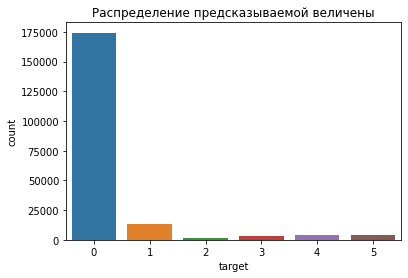

In [15]:
sns.countplot(x = "target" , data  = df).set_title('Распределение предсказываемой величены')

Text(0.5, 1.0, 'Распределение возраста')

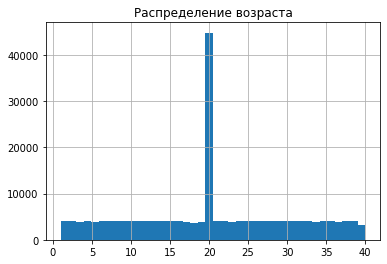

In [16]:
df["age_indicator"].hist(bins = 40).set_title('Распределение возраста')

In [17]:
max(df["age_indicator"])

40.0

Взглянем на несколько величин сразу

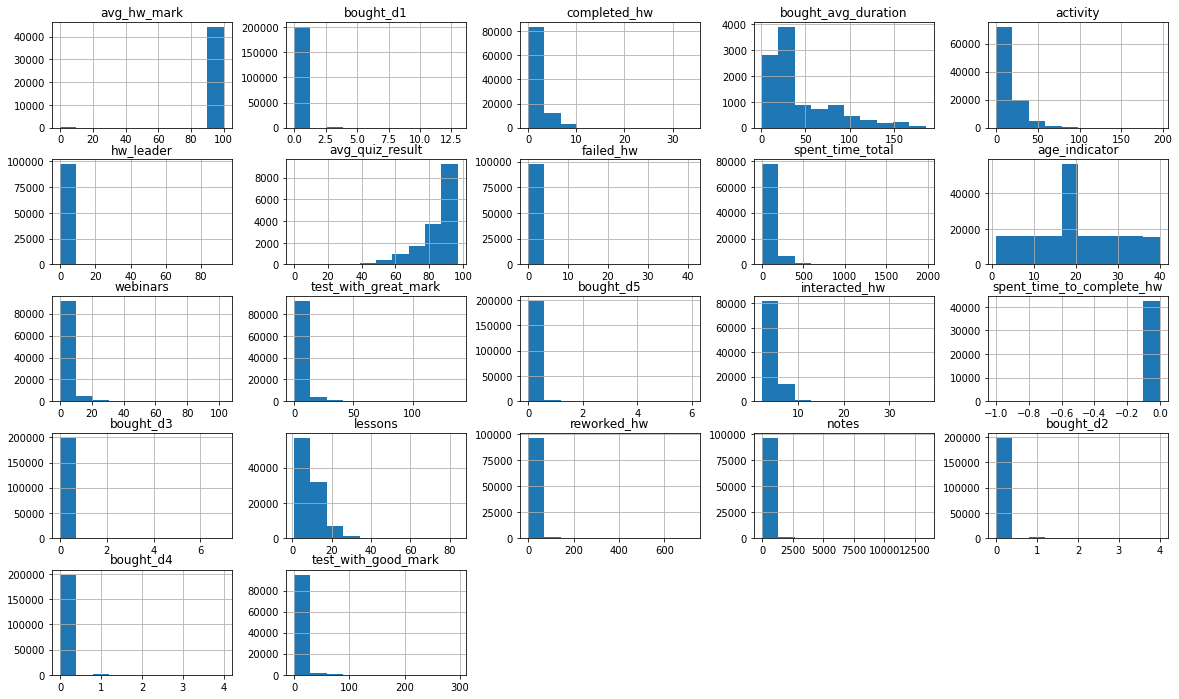

In [18]:
features = list(set(['age_indicator',
       'carts_created_at', 'spent_time_total', 'spent_time_to_complete_hw',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4',
       'bought_d5', 'bought_avg_duration']))

_ = df[features].hist(figsize=(20,12))

Обратим внимание на часть столбцов с постоянными значениями

In [19]:
df.spent_time_to_complete_hw.value_counts()

 0.0    42466
-1.0        1
Name: spent_time_to_complete_hw, dtype: int64

In [20]:
df.bought_d4.value_counts()

0    198694
1      1262
3        40
4         4
Name: bought_d4, dtype: int64

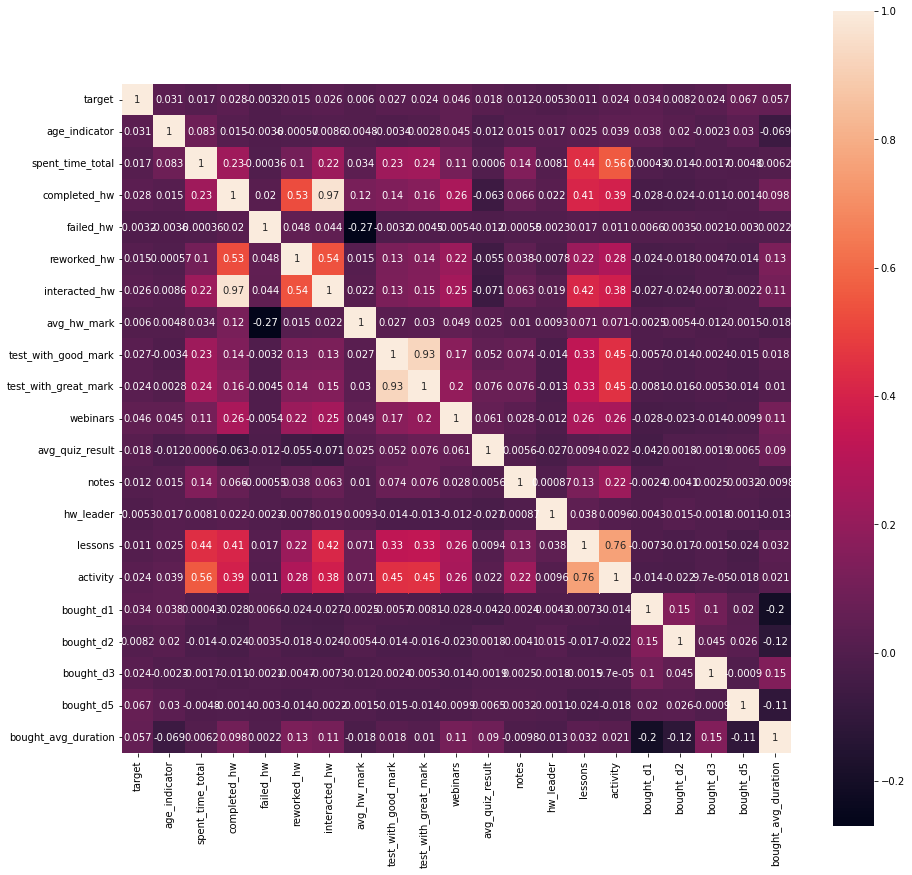

In [21]:
plt.rcParams['figure.figsize']=(15,15)

df_corr = df[["target",'age_indicator',
       'carts_created_at', 'spent_time_total',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3',
       'bought_d5', 'bought_avg_duration']]

g = sns.heatmap(df_corr.corr(), square = True, annot=True)

## Выделим выборки

Удалим те столбцы, которые не будет обрабатывать, а также столбец 'browser'

In [22]:
new_df = df.drop(['month_id', 'carts_created_at', 'browser'], axis=1)

In [23]:
new_df_test = df_test.drop(['month_id', 'carts_created_at', 'browser'], axis=1)

Заполним оставшиеся значения категориальных переменных:

In [24]:
new_df['promo'].fillna('No', inplace=True)
new_df['communication_type'].fillna('No', inplace=True)
new_df['ABC'].fillna('No', inplace=True)
new_df['city'].fillna('No', inplace=True)
new_df['country'].fillna('No', inplace=True)
new_df['os'].fillna('No', inplace=True)
new_df['platform'].fillna('No', inplace=True)

In [25]:
new_df_test['promo'].fillna('No', inplace=True)
new_df_test['communication_type'].fillna('No', inplace=True)
new_df_test['ABC'].fillna('No', inplace=True)
new_df_test['city'].fillna('No', inplace=True)
new_df_test['country'].fillna('No', inplace=True)
new_df_test['os'].fillna('No', inplace=True)
new_df_test['platform'].fillna('No', inplace=True)

Оставшиеся числовые значения заполним '-999', для того, чтобы модель могла интерпретировать их как выбросы:

In [26]:
new_df.fillna(-999, inplace=True)

In [27]:
new_df_test.fillna(-999, inplace=True)

In [28]:
X = new_df.drop(['target'], axis = 1)
y = new_df[["target"]]

In [29]:
X

,id,age_indicator,student_id,program_id,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,reworked_hw,interacted_hw,...,p_missed_calls,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5
0,15182,32.0,6694527,1469,163.0,0.0,1.0,0.0,17.0,3.0,...,-999.0,-999.0,-999.0,-999.0,4.0,5.0,-999.0,-999.0,-999.0,-999.0
1,89385,20.0,6712877,1392,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,47931,20.0,6659444,376,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,279085,1.0,7151591,1160,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,7806,30.0,6705666,952,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,5.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,179932,27.0,6816668,1043,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,5.0,-999.0,-999.0,-999.0,-999.0,-999.0
199996,257734,20.0,6984939,1635,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,4.5,-999.0,-999.0,-999.0,-999.0
199997,43549,17.0,6670084,789,-999.0,-999.0,0.0,0.0,0.0,2.0,...,-999.0,-999.0,-999.0,-999.0,3.0,-999.0,-999.0,-999.0,4.0,-999.0
199998,100800,20.0,6917324,476,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [30]:
X_real_test = new_df_test

In [31]:
X.shape

(200000, 55)

In [32]:
X.dtypes

id                             int64
age_indicator                float64
student_id                     int64
program_id                     int64
spent_time_total             float64
spent_time_to_complete_hw    float64
completed_hw                 float64
failed_hw                    float64
reworked_hw                  float64
interacted_hw                float64
avg_hw_mark                  float64
test_with_good_mark          float64
test_with_great_mark         float64
webinars                     float64
avg_quiz_result              float64
notes                        float64
hw_leader                    float64
lessons                      float64
activity                     float64
bought_d1                      int64
bought_d2                      int64
bought_d3                      int64
bought_d4                      int64
bought_d5                      int64
bought_avg_duration          float64
payment_type                   int64
promo                         object
p

Выделим индексы категориальных переменных:

In [33]:
categorical_features_indices = np.where(X.dtypes == object)[0]

In [34]:
categorical_features_indices

array([26, 28, 30, 31, 32, 35, 36])

## Обучение модели

Будем использовать градиентный бустинг в реализации Яндекса. Так как бустинг довольно устойчив к переобучению, для тренировки модели будем использовать весь датасет. Гиперпараметры были подобраны заранее.

In [35]:
!pip install catboost
from catboost import CatBoostClassifier, Pool, metrics, cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [36]:
model=CatBoostClassifier(
                         iterations=17000,
                         learning_rate=0.1,
                         cat_features=categorical_features_indices,
                         max_depth=10,
                         verbose=100,
                         random_seed=42,
                         loss_function='MultiClass',
                         early_stopping_rounds=500,
                         task_type='GPU'
                        )

Обучим модель:

In [37]:
model.fit(X, y)

0:	learn: 1.4505553	total: 164ms	remaining: 46m 27s
100:	learn: 0.3700877	total: 18.4s	remaining: 51m 10s
200:	learn: 0.3142617	total: 24.7s	remaining: 34m 22s
300:	learn: 0.2743092	total: 31s	remaining: 28m 41s
400:	learn: 0.2474719	total: 37.3s	remaining: 25m 43s
500:	learn: 0.2218549	total: 43.6s	remaining: 23m 57s
600:	learn: 0.1996183	total: 50.1s	remaining: 22m 45s
700:	learn: 0.1815492	total: 56.4s	remaining: 21m 50s
800:	learn: 0.1656591	total: 1m 2s	remaining: 21m 7s
900:	learn: 0.1518260	total: 1m 9s	remaining: 20m 35s
1000:	learn: 0.1396293	total: 1m 15s	remaining: 20m 6s
1100:	learn: 0.1292656	total: 1m 21s	remaining: 19m 43s
1200:	learn: 0.1197643	total: 1m 29s	remaining: 19m 36s
1300:	learn: 0.1111258	total: 1m 35s	remaining: 19m 15s
1400:	learn: 0.1043086	total: 1m 42s	remaining: 18m 56s
1500:	learn: 0.0969823	total: 1m 48s	remaining: 18m 39s
1600:	learn: 0.0913923	total: 1m 54s	remaining: 18m 23s
1700:	learn: 0.0854902	total: 2m 1s	remaining: 18m 9s
1800:	learn: 0.08041

## Загрузка результата:

In [38]:
y_pred_cat = model.predict(X_real_test)
y_pred_cat_true = []
for i in y_pred_cat:
  y_pred_cat_true.append(i[0])
output=pd.DataFrame(data={"id":new_df_test["id"],"target":y_pred_cat_true})
output.to_csv('output_final.csv', na_rep = '0', index=False) 